# **Visual Information Processing Lab**

# CIFAR10 vs MLP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/2021/MTech')
print(os.getcwd())

/content/drive/My Drive/2021/MTech


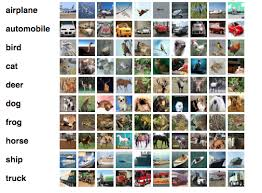

In [3]:
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/2021/MTech/Files/cifar.jpeg', embed=True))

#### Imports

In [4]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Fetching and Visualizattion

In [5]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


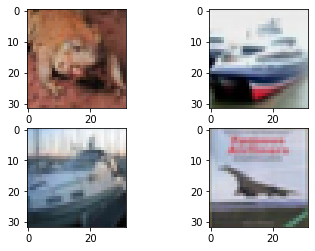

In [8]:
plt.subplot(221).imshow(xtest[5],cmap='hot')
plt.subplot(222).imshow(xtest[1],cmap='gray')
plt.subplot(223).imshow(xtest[2],cmap='viridis')
plt.subplot(224).imshow(xtest[3],cmap='Reds')

In [9]:
print(ytest[5])
print(ytest[1])
print(ytest[2])
print(ytest[3])

[6]
[8]
[8]
[0]


In [10]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [11]:
print(type(xtrain))
print(xtrain.ndim)
print(xtrain.dtype)

<class 'numpy.ndarray'>
4
uint8


In [12]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])
print(xtrain.shape[3])
print(ytrain.shape[0])

50000
32
32
3
50000


#### Data Pre Processing
* Normalization
* One Hot Encoding

In [13]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [14]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
120.70748
64.150024
2.0934134 2.0934134
-1.8816435 -1.8816435


In [15]:
xtrain = xtrain.reshape(xtrain.shape[0],3072)
xtest  = xtest.reshape(xtest.shape[0],3072)
print(xtrain.shape)
print(xtest.shape)

(50000, 3072)
(10000, 3072)


In [16]:
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print(ytrain.shape)
print(ytest.shape)

(50000, 10)
(10000, 10)


In [17]:
print(ytest[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


#### MLP Model
* Model building
* Compiling
* Training

In [18]:
import keras
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(10,input_shape = (3072,), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


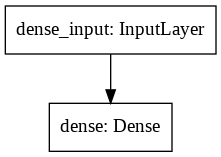

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [22]:
import os
os.chdir('/content/drive/My Drive/2021/MTech/Weights/10/')
print(os.getcwd())
from keras.callbacks import EarlyStopping,ModelCheckpoint
mc = ModelCheckpoint('cifar10_MLP.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
filepath = "saved-model-{epoch:02d}.h5"
mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)
cv = keras.callbacks.CSVLogger('cifar10_MLP.csv', separator=',', append=False)

/content/drive/My Drive/2021/MTech/Weights/10


In [23]:
from keras.losses import categorical_crossentropy

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [24]:
class WeightCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%1 == 0:
            fig, axs = plt.subplots(1,10, figsize=(10*1.5,1.5), facecolor='w', edgecolor='k')
            for i in range(10):
                axs[i].set_title("Digit : " + str(i))
                digit = model.layers[0].get_weights()[0][:,i]
                digit = ((digit - digit.min())*(1/(digit.max() - digit.min()))*255).astype("uint8")
                axs[i].imshow(digit.reshape(32,32,3),cmap="viridis")
weight = WeightCallback()

In [25]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256,epochs=20, verbose=1,callbacks=[weight,mc,mc1,cv])
model.evaluate(xtest,ytest)

Output hidden; open in https://colab.research.google.com to view.

#### Performance Evaluation
* Loss and Accuracy Plots
* Evaluate
* Prediction
* Confusion Matrix

In [26]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

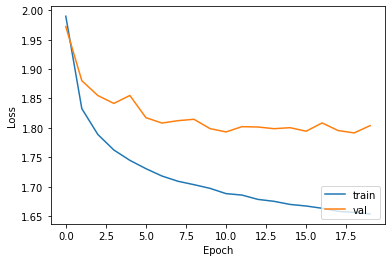

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

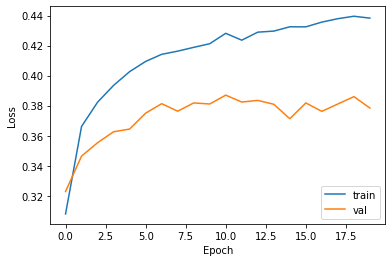

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

In [29]:
#model.save_weights('')
model.load_weights('cifar10_MLP.h5')
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 1.7786 - accuracy: 0.3865


[1.7785980701446533, 0.3865000009536743]

In [30]:
i=0
print("Actual is",ytest[i])
pred=model.predict(xtest[i].reshape(1,3072))
#print(pred)
print(pred.argmax())

Actual is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


In [31]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.47      0.43      0.45      1000
     class 1       0.45      0.45      0.45      1000
     class 2       0.28      0.28      0.28      1000
     class 3       0.28      0.22      0.24      1000
     class 4       0.35      0.28      0.31      1000
     class 5       0.36      0.28      0.31      1000
     class 6       0.34      0.52      0.41      1000
     class 7       0.47      0.43      0.45      1000
     class 8       0.44      0.56      0.50      1000
     class 9       0.42      0.41      0.42      1000

    accuracy                           0.39     10000
   macro avg       0.39      0.39      0.38     10000
weighted avg       0.39      0.39      0.38     10000



In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[434  50 109  27  21  13  32  42 197  75]
 [ 44 454  23  42  26  29  66  58 113 145]
 [ 85  28 281  68 110  64 210  73  54  27]
 [ 30  53 127 219  58 153 199  49  52  60]
 [ 47  19 130  61 276  61 242 103  34  27]
 [ 40  43 119 162  90 277 112  65  65  27]
 [ 11  35  98 110  88  56 523  34  25  20]
 [ 42  38  80  51  87  63  73 432  49  85]
 [134  83  23  18  13  33  26  16 560  94]
 [ 64 216  24  31  12  22  55  55 112 409]]


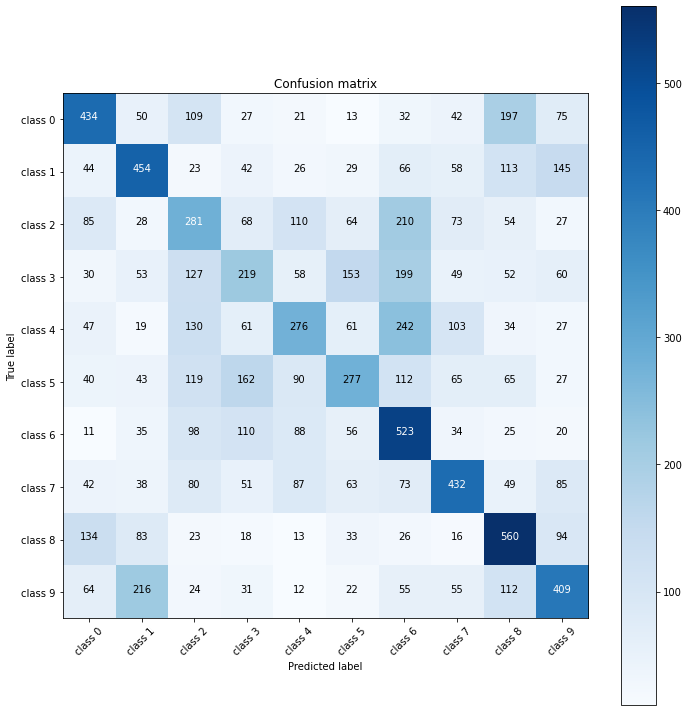

In [33]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')